# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [1]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 33.6 MB/s 
     |████████████████████████████████| 182 kB 68.1 MB/s 
     |████████████████████████████████| 166 kB 67.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 166 kB 49.9 MB/s 
     |████████████████████████████████| 162 kB 33.2 MB/s 
     |████████████████████████████████| 162 kB 66.5 MB/s 
     |████████████████████████████████| 158 kB 52.3 MB/s 
     |████████████████████████████████| 157 kB 49.4 MB/s 
     |████████████████████████████████| 157 kB 17.9 MB/s 
     |████████████████████████████████| 157 kB 16.2 MB/s 
     |████████████████████████████████| 157 kB 16.2 MB/s 
     |████████████████████████████████| 157 kB 52.6 MB/s 
     |████████████████████████████████| 157 kB 47.0 MB/s 
     |████████████████████████████████| 157 kB 51.1 MB/s 
     |███████████████████████████

In [2]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

from torchmetrics.functional import accuracy
from torchvision.models import resnet18
# You may add any imports you need

In [6]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2022-11-02 18:42:11--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2022-11-02 18:42:11--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc60a9e11e9b3507916d1cb36727.dl.dropboxusercontent.com/cd/0/get/BwCXfYiyJ3tUewzaXavYgYQd2EuF9s_notFEIwZkaYmJoBOAlX0x0y4dBt3uRWd9N3vaoXuvkj0DhPRil-VkHxE4JtObsTf97H5J0yKuAzifsjtdijZElSlP4kjV_zCfFnHhCbZ5ezGf0u0EWM7yvMBXLx4-po1fZP9NfjCoQwh-xQ/file?dl=1# [following]
--2022-11-02 18:42:12--  https://uc60a9e11e9b3507916d1cb36727.dl.dropboxusercontent.com/cd/0/get/BwCXfYiyJ3tUewzaXavYgYQd2EuF9s_notFEIwZkaYmJoBOAlX0x0y4dBt3uRWd9N3vaoXuvkj0DhP

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True) 

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели. 
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать: 

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали. 
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [8]:
# YOU CAN DEFINE AUGMENTATIONS HERE
seed_everything(123456)
import PIL
train_transform = transforms.Compose(
    [
        transforms.RandomApply([
            transforms.RandomHorizontalFlip(0.15),
            transforms.ColorJitter(hue=.05, saturation=.05),
            transforms.TrivialAugmentWide(),
            transforms.RandomPerspective(distortion_scale=0.4, p=0.2),
            transforms.RandomRotation(20, interpolation=PIL.Image.BILINEAR),
        ], p=0.65),
        transforms.ToTensor(),

        transforms.Normalize(mean=[0.5, 0.5, 0.5], 
                            std=[0.5, 0.5, 0.5])
    ]
)
val_transform = transforms.Compose(
    [        
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], 
                            std=[0.5, 0.5, 0.5])
    ]
)

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)


train_dataloader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True
)
val_dataloader = DataLoader(
    val_dataset,
    batch_size=64,
    shuffle=False
)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1306: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "


In [9]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

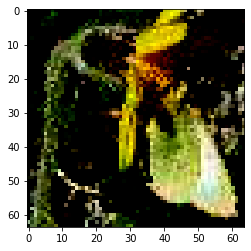

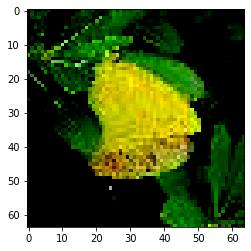

In [10]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1. 

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [21]:
seed_everything(123456)
model = nn.Sequential(    
        nn.Conv2d(3, 64, kernel_size=3, padding=1, stride=1),
        nn.BatchNorm2d(64, eps=1e-05, momentum=0.1),
        nn.ReLU(inplace=True),
        nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1),
        nn.BatchNorm2d(128, eps=1e-05, momentum=0.1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(128, 128, kernel_size=3, padding=1, stride=1),
        nn.BatchNorm2d(128, eps=1e-05, momentum=0.1),
        nn.ReLU(inplace=True),
        nn.Conv2d(128, 128, kernel_size=3, padding=1, stride=1),
        nn.BatchNorm2d(128, eps=1e-05, momentum=0.1),
        nn.ReLU(inplace=True),
        nn.Conv2d(128, 256, kernel_size=3, padding=1, stride=1),
        nn.BatchNorm2d(256, eps=1e-05, momentum=0.1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(256, 512,kernel_size=3, padding=1, stride=1),
        nn.BatchNorm2d(512, eps=1e-05, momentum=0.1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1),
        nn.BatchNorm2d(512, eps=1e-05, momentum=0.1),
        nn.ReLU(inplace=True),
        nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1),
        nn.BatchNorm2d(512, eps=1e-05, momentum=0.1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=4, stride=4),
        nn.Flatten(start_dim=1, end_dim=-1),
        nn.Linear(2048, 200, bias=True)   
)

### Тренировочный класс lightning

In [22]:
seed_everything(123456)
class YourModule(pl.LightningModule):
    def __init__(self, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x):
      preds = self.model(x)
      return preds

    def configure_optimizers(self):
        return self.optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long())
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)


In [23]:
wandb.finish()
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning

accuracy,▁▃▅▆▆▇██
epoch,▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇█
train_loss,█▇▇▆▆▆▅▆▅▅▅▅▃▄▄▄▅▃▄▃▄▄▃▃▃▂▂▃▃▃▂▂▃▁▃▃▂▂▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▆▃▃▃▂▁▁
accuracy,0.4417
epoch,6
train_loss,2.05252
trainer/global_step,11177
val_loss,2.36964


In [24]:
seed_everything(123456)
model1 = YourModule(learning_rate=0.0002)

trainer = pl.Trainer(
    accelerator="gpu",
    max_epochs=9, logger=wandb_logger)

trainer.fit(model1, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | Sequential       | 7.0 M 
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
7.0 M     Trainable params
0         Non-trainable params
7.0 M     Total params
27.920    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=9` reached.


In [25]:
from sklearn.metrics import accuracy_score
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    predicted_classes = torch.Tensor([]).to(device)
    true_classes = torch.Tensor([]).to(device)

    model.eval()
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images.to(device), labels.to(device)

            pred = model.forward(images)
            pred_classes = torch.argmax(pred, dim=-1)

            predicted_classes = torch.cat((predicted_classes, pred_classes), 0)
            true_classes = torch.cat((true_classes, labels), 0)

    return accuracy_score(predicted_classes.cpu().detach().numpy(), true_classes.cpu().detach().numpy())

### Валидация результатов задания

In [26]:
accuracy1 = evaluate_task(model1, val_dataloader)


100%|██████████| 157/157 [00:08<00:00, 17.88it/s]


In [27]:
print(f"Accuracy: {accuracy1}")
print(f"Оценка за это задание составит {np.clip(10 * accuracy1 / 0.44, 0, 10):.2f} баллов")

Accuracy: 0.4623
Оценка за это задание составит 10.00 баллов


# Отчёт об экспериментах 

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

Начинала все эксперименты с попыток подобрать параметры для готовой архитектуры resnet18, потратила на это кучу времени, пробовала разные аугментации (в итоге хорошим вариантом оказалось делать RandomApply из разных аугментаций, а не применять их все вместе), либо просто остановиться на простой вроде горизонтального филипа (так сделала во 2 части). Потом долго и упорно подбирала лернинг рейт. Пробовала автоматический подбор, но на самом деле лучшее качество показывал подобранный мной вручную. Изменение батч сайза с 256 до 64 также улучшило качество. Нормализация повысила качество. Но самая лучшая модель с resnet18 показывала accuracy 0.385.   
После чего было решено попробовать написать свою архитектуру, взяв за основу vgg16, внеся немного изменений и добавив батчнорм. Это значительно улучшило качество и после недолгого подбора lr позволило достичь accuracy >= 0.44


На скриншоте ниже видны модели (не все), полученные на основе архитектуры resnet18, и 2 модели со своей архитектурой (видно что первую модель своей архитектуры я недообучала, но я решила немного поменять lr (с 0.0001 на 0.0002) и запустить обучение заново, увеличив количество эпох).

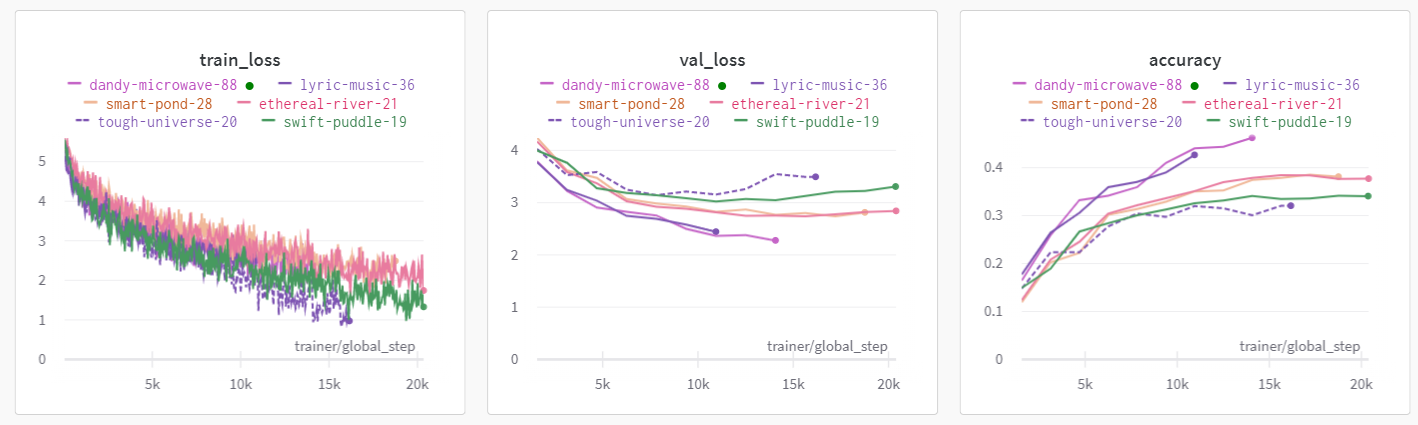